<a href="https://colab.research.google.com/github/drishtiiii/Brain-Tumor-Detection-VGG16-Model/blob/main/Brain_tumorDetection_using_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/archive_31.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import tensorflow as tf
import keras,os
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#generators
trdata = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
traindata = trdata.flow_from_directory(directory="/content/archive_3/train",target_size=(224,224),batch_size = 16,
                                                 class_mode = 'binary')
remdata = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.50)

validationdata=remdata.flow_from_directory(directory="/content/archive_3/validation", target_size=(224,224),batch_size = 16,
                                            class_mode = 'binary', subset="training")
testdata=remdata.flow_from_directory(directory="/content/archive_3/validation", target_size=(224,224),batch_size = 16,
                                            class_mode = 'binary', subset="validation")

Found 1792 images belonging to 2 classes.
Found 604 images belonging to 2 classes.
Found 604 images belonging to 2 classes.


(16, 224, 224, 3)


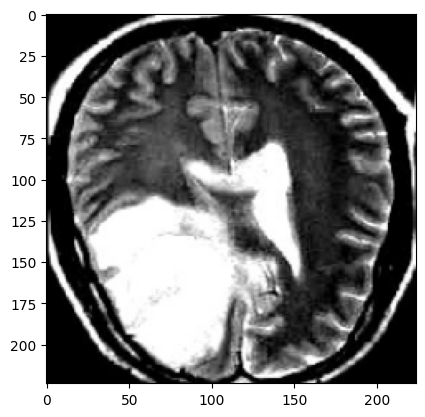

(16, 224, 224, 3)


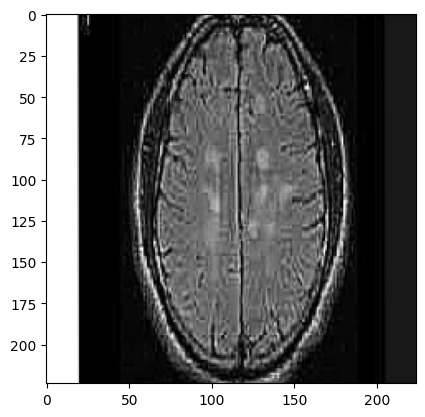

(16, 224, 224, 3)


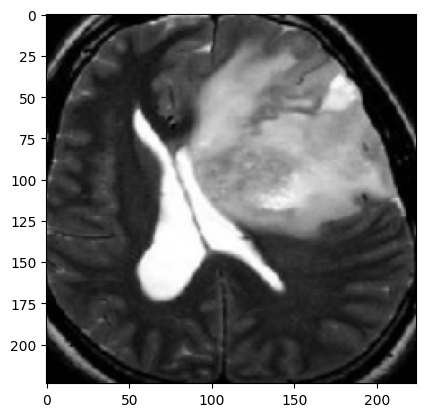

(16, 224, 224, 3)


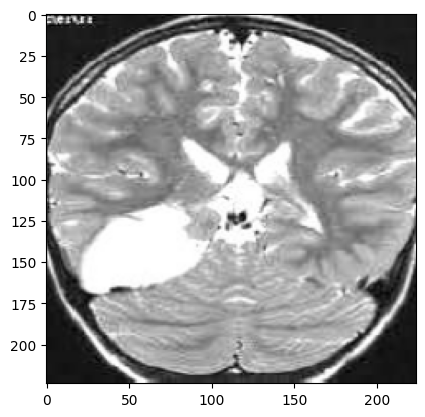

(16, 224, 224, 3)


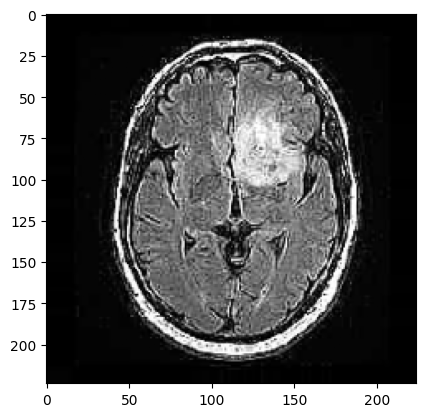

In [5]:
for _ in range(5):
    img, label = traindata.next()
    print(img.shape)   #  (1,224,224,3)
    plt.imshow(img[0])
    plt.show()

In [6]:
from keras.applications.vgg16 import VGG16
model = VGG16(input_shape=(224,224,3))

print(model.summary())
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1, activation="softmax"))


553467096/553467096 [==============================] - 25s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
H = model.fit_generator(steps_per_epoch=10,generator=traindata,validation_data=testdata,epochs=20,verbose=1,shuffle=True)

<ipython-input-9-25adc2a4c817>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(steps_per_epoch=10,generator=traindata,validation_data=testdata,epochs=20,verbose=1,shuffle=True)


Epoch 1/20
10/10 [==============================] - 37s 2s/step - loss: 1.3540 - accuracy: 0.5250 - val_loss: 0.6939 - val_accuracy: 0.5265
Epoch 2/20
10/10 [==============================] - 12s 1s/step - loss: 0.6948 - accuracy: 0.5063 - val_loss: 0.6929 - val_accuracy: 0.5265
Epoch 3/20
10/10 [==============================] - 12s 1s/step - loss: 0.6945 - accuracy: 0.4750 - val_loss: 0.6947 - val_accuracy: 0.5265
Epoch 4/20
10/10 [==============================] - 13s 1s/step - loss: 0.6913 - accuracy: 0.4563 - val_loss: 0.6954 - val_accuracy: 0.5265
Epoch 5/20
10/10 [==============================] - 12s 1s/step - loss: 0.6916 - accuracy: 0.4688 - val_loss: 0.6970 - val_accuracy: 0.5265
Epoch 6/20
10/10 [==============================] - 13s 1s/step - loss: 0.6947 - accuracy: 0.4875 - val_loss: 0.6981 - val_accuracy: 0.5265
Epoch 7/20
10/10 [==============================] - 13s 1s/step - loss: 0.6951 - accuracy: 0.5063 - val_loss: 0.6954 - val_accuracy: 0.5265
Epoch 8/20
10/10 [==

In [10]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(testdata)

# Print the results
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

38/38 [==============================] - 10s 251ms/step - loss: 0.6999 - accuracy: 0.5265
Test Loss: 0.6998913288116455
Test Accuracy: 0.5264900922775269


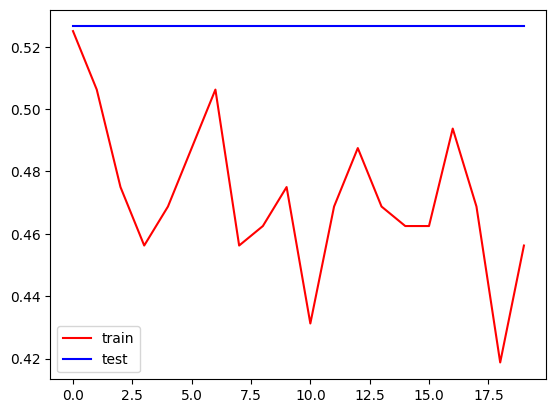

In [11]:
import matplotlib.pyplot as plt

plt.plot(H.history['accuracy'],color='red',label='train')
plt.plot(H.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

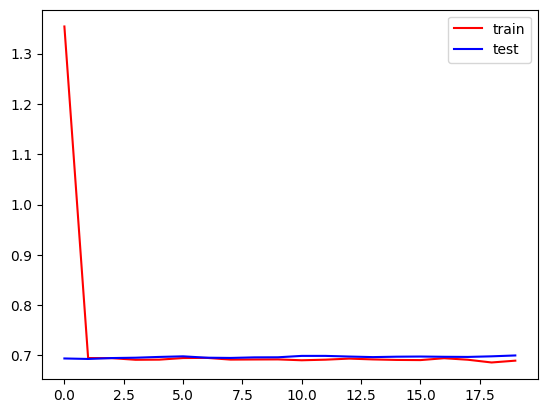

In [12]:
plt.plot(H.history['loss'],color='red',label='train')
plt.plot(H.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

In [13]:
model.save("./vgg16.h5")


In [ ]:
import cv2
import pandas as pd

import skimage
from random import randint
import numpy as np
import PIL
import matplotlib.pyplot as plt

In [15]:
Image= cv2.imread('/content/archive_3/Br35H-Mask-RCNN/TEST/y701.jpg')

In [16]:
image=PIL.Image.open('/content/archive_3/Br35H-Mask-RCNN/TEST/y701.jpg')
image_array= np.array(image)
float_array = image_array.astype(np.float32)
print(image_array)
print(float_array.dtype)

[[[6 6 6]
  [6 6 6]
  [6 6 6]
  ...
  [6 6 6]
  [6 6 6]
  [6 6 6]]

 [[6 6 6]
  [6 6 6]
  [6 6 6]
  ...
  [6 6 6]
  [6 6 6]
  [6 6 6]]

 [[6 6 6]
  [6 6 6]
  [6 6 6]
  ...
  [6 6 6]
  [6 6 6]
  [6 6 6]]

 ...

 [[6 6 6]
  [6 6 6]
  [6 6 6]
  ...
  [6 6 6]
  [6 6 6]
  [6 6 6]]

 [[6 6 6]
  [6 6 6]
  [6 6 6]
  ...
  [6 6 6]
  [6 6 6]
  [6 6 6]]

 [[6 6 6]
  [6 6 6]
  [6 6 6]
  ...
  [6 6 6]
  [6 6 6]
  [6 6 6]]]
float32
[[[6 6 6]
  [6 6 6]
  [6 6 6]
  ...
  [6 6 6]
  [6 6 6]
  [6 6 6]]

 [[6 6 6]
  [6 6 6]
  [6 6 6]
  ...
  [6 6 6]
  [6 6 6]
  [6 6 6]]

 [[6 6 6]
  [6 6 6]
  [6 6 6]
  ...
  [6 6 6]
  [6 6 6]
  [6 6 6]]

 ...

 [[6 6 6]
  [6 6 6]
  [6 6 6]
  ...
  [6 6 6]
  [6 6 6]
  [6 6 6]]

 [[6 6 6]
  [6 6 6]
  [6 6 6]
  ...
  [6 6 6]
  [6 6 6]
  [6 6 6]]

 [[6 6 6]
  [6 6 6]
  [6 6 6]
  ...
  [6 6 6]
  [6 6 6]
  [6 6 6]]]
float32
